#**Install necessary Libraries**

In [ ]:
# Use an Older Version of Scikit-learn
pip install scikit-learn==1.2.2

#**Import the Libraries**

In [48]:
## import some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

#**Data Collection and Analysis**

In [49]:
# Loading the dataset into a pandas DataFrame
big_mart_sales_data = pd.read_csv('Train.csv')  # Use this to identify issues

In [50]:
# Display the first few rows
print("First 5 rows of the dataset:")
big_mart_sales_data.head()


First 5 rows of the dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
# Display the last few rows
print("Last 5 rows of the dataset:")
big_mart_sales_data.tail()


Last 5 rows of the dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [52]:
# Checking the shape of the dataset
big_mart_sales_data.shape    # Outputs the number of rows and columns in the dataset.

(8523, 12)

In [53]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
big_mart_sales_data.describe()


Statistical Description of the Dataset:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [54]:
# Check for missing values
missing_values = big_mart_sales_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [55]:
# Geerating some Information about the dataset
big_mart_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [56]:
# Checking the distribution of data
print("\nDistribution of Data:")
print(big_mart_sales_data.value_counts())


Distribution of Data:
Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                      

**Categorical Features**



*   Item_Identifier
*   Item_Fat_Content
*   Item_Type
*   Outlet_Identifier
*   Outlet_Size
*   Outlet_Location_Type
*   Outlet_Type







## **Handling Missing Value**

Mean --> Average value

Mode --> Most occuring value

Replacing the missing values in "Item_weight" column with mean

In [57]:
# Mean value of "Item_weight" column
big_mart_sales_data_mean = big_mart_sales_data['Item_Weight'].mean()

In [58]:
# Filling the mising values in "Item_weight" column with "mean value"
big_mart_sales_data['Item_Weight'].fillna(big_mart_sales_data_mean, inplace=True)

<ipython-input-58-5bae1409687d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  big_mart_sales_data['Item_Weight'].fillna(big_mart_sales_data_mean, inplace=True)


In [59]:
# Check for missing values
missing_values = big_mart_sales_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


Replacing the missing values in "Outlet_Size" column with mode

In [60]:
# Mode value of "Outlet_Size" column
mode_of_outlet_size = big_mart_sales_data.pivot_table(values='Outlet_Size',
                                                      columns=['Outlet_Type'],
                                                      aggfunc=(lambda x: x.mode()[0]))
print("\nMode value of 'Outlet_Size' column:")
print(mode_of_outlet_size)


Mode value of 'Outlet_Size' column:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [61]:
missing_values_in_outlet_size = big_mart_sales_data['Outlet_Size'].isnull()
print("\nMissing values in 'Outlet_Size' column:")
print(missing_values_in_outlet_size)


Missing values in 'Outlet_Size' column:
0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [62]:
big_mart_sales_data.loc[missing_values_in_outlet_size,
                        'Outlet_Size'] = big_mart_sales_data.loc[missing_values_in_outlet_size,
                                                                'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
#

In [63]:
# Check for missing values
missing_values = big_mart_sales_data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Missing values in each column:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


# **Data Analysis**

In [64]:
# Statistical description of the dataset
print("\nStatistical Description of the Dataset:")
big_mart_sales_data.describe()


Statistical Description of the Dataset:


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Numerical Features**

In [65]:
sns.set()

<ipython-input-66-35eb7d94b426>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_sales_data["Item_Weight"])


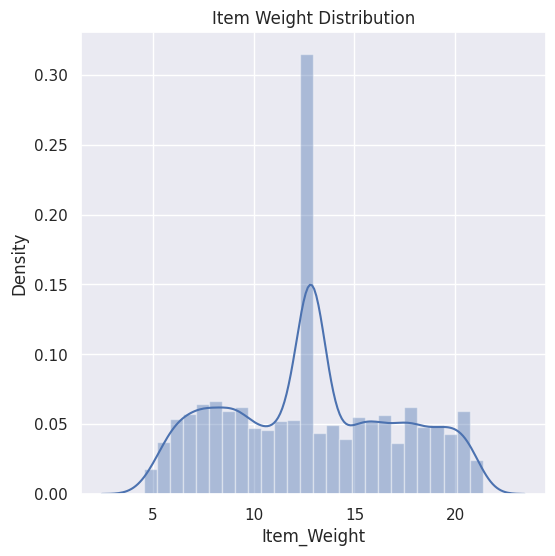

In [66]:
# Distribution graph of Item_Weight column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_data["Item_Weight"])
plt.title("Item Weight Distribution")
plt.show()

<ipython-input-67-671eecae1913>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_sales_data["Item_Visibility"])


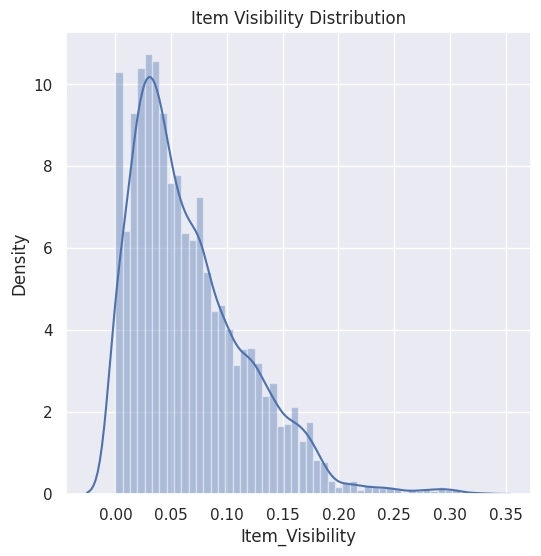

In [67]:
# Distribution graph of Item_Visibility column
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_data["Item_Visibility"])
plt.title("Item Visibility Distribution")
plt.show()

<ipython-input-68-fd7aa9d7aa21>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_sales_data["Item_MRP"])


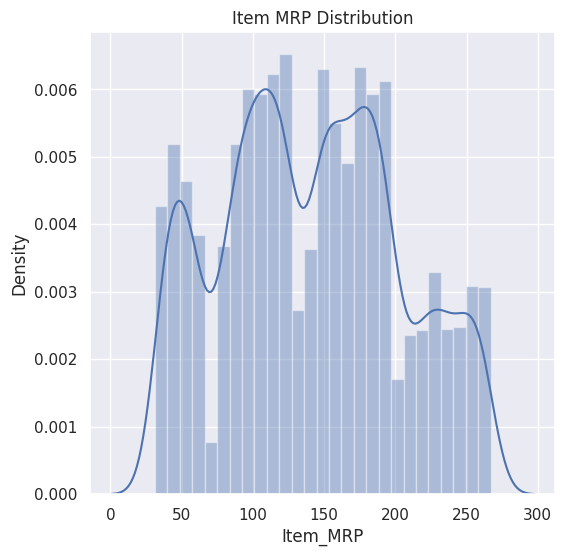

In [68]:
# Distribution graph of Item_MRP column
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_data["Item_MRP"])
plt.title("Item MRP Distribution")
plt.show()

<ipython-input-69-45c1c5fca588>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_sales_data["Item_Outlet_Sales"])


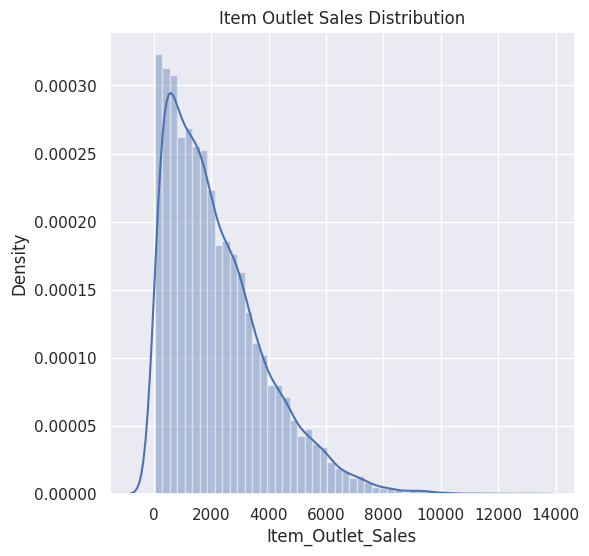

In [69]:
# Distribution graph of Item_Outlet_Sales column
plt.figure(figsize=(6,6))
sns.distplot(big_mart_sales_data["Item_Outlet_Sales"])
plt.title("Item Outlet Sales Distribution")
plt.show()

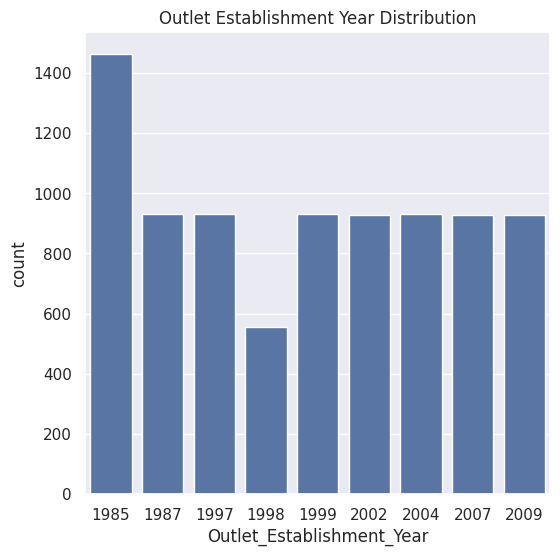

In [70]:
# Distribution graph of Outlet_Establishment_Year Column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_sales_data)
plt.title("Outlet Establishment Year Distribution")
plt.show()

**Correlation**

In [71]:
numerical_data = big_mart_sales_data.select_dtypes(include=['number'])

In [72]:
corr = numerical_data.corr()


corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


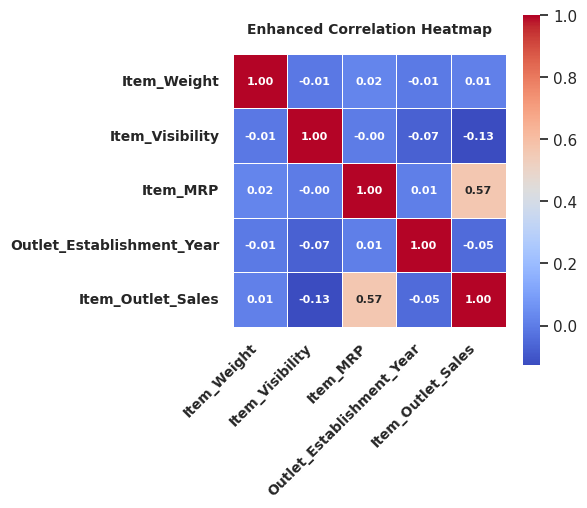

In [73]:
# Create the heatmap with enhancements
plt.figure(figsize=(6, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"shrink": 0.8},
    linewidths=0.5,
    square=True,
    annot_kws={"size": 8, "weight": "bold"},
)
plt.title("Enhanced Correlation Heatmap", fontsize=10, fontweight="bold", pad=15)
plt.xticks(fontsize=10, rotation=45, ha="right", weight="bold")
plt.yticks(fontsize=10, weight="bold")
plt.tight_layout()

**Categorical Features**

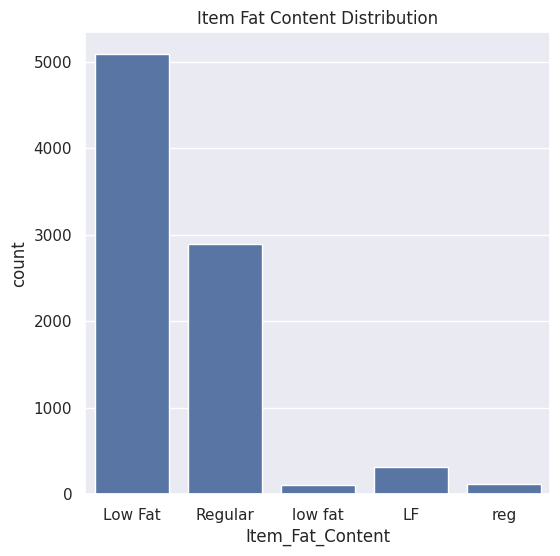

In [74]:
# Distribution graph of Item_Fat_Content Column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_sales_data)
plt.title("Item Fat Content Distribution")
plt.show()

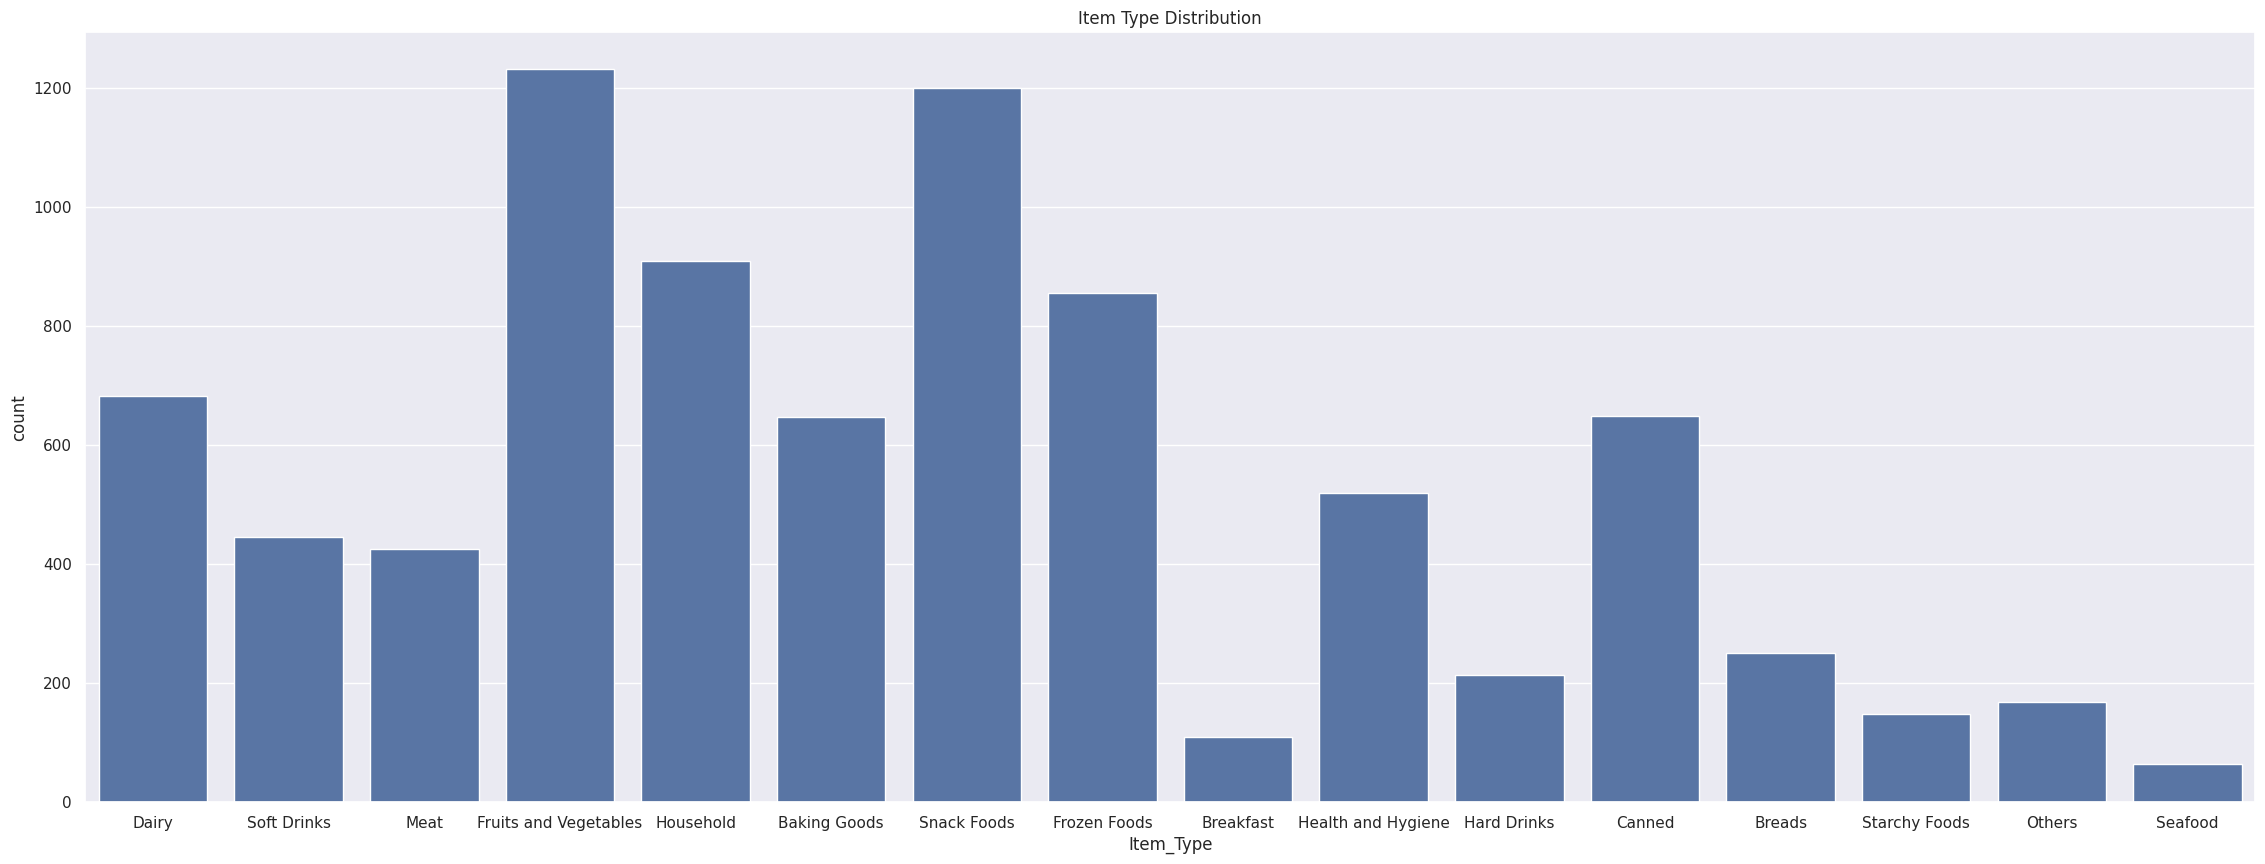

In [75]:
# Distribution graph of Item_Type Column
plt.figure(figsize=(28,10))
sns.countplot(x='Item_Type', data=big_mart_sales_data)
plt.title("Item Type Distribution")
plt.show()

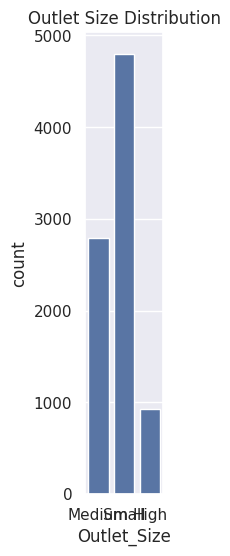

In [76]:
# Distribution graph of Outlet_Size Column
plt.figure(figsize=(1,6))
sns.countplot(x='Outlet_Size', data=big_mart_sales_data)
plt.title("Outlet Size Distribution")
plt.show()

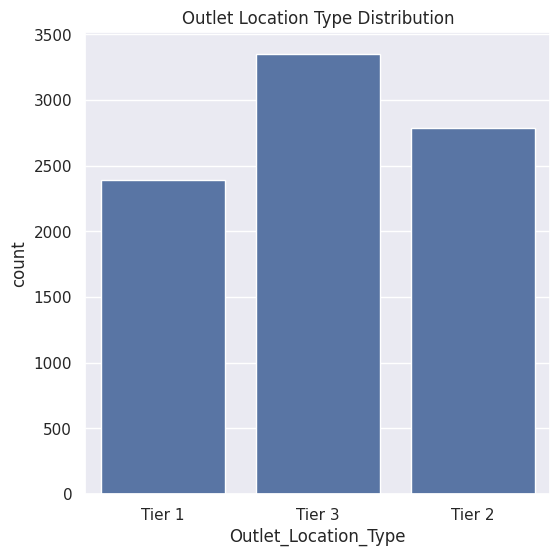

In [77]:
# Distribution graph of Outlet_Location_Type Column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=big_mart_sales_data)
plt.title("Outlet Location Type Distribution")
plt.show()

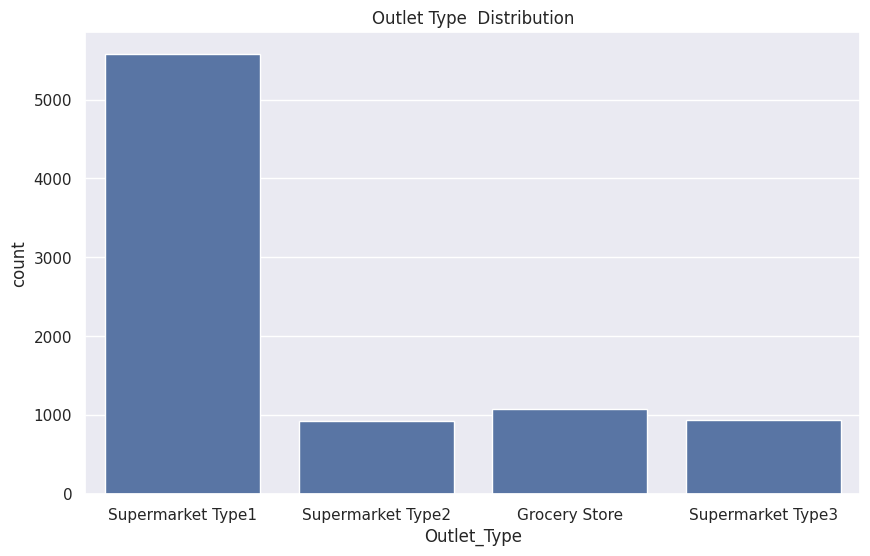

In [78]:
# Distribution graph of Outlet_Type  Column
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type', data=big_mart_sales_data)
plt.title("Outlet Type  Distribution")
plt.show()

# **Data Preprocessing**

In [79]:
# Display the first few rows
print("First 5 rows of the dataset:")
big_mart_sales_data.head()

First 5 rows of the dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [80]:
# Checking the distribution of Item_Fat_Content data
print("\nDistribution of Data:")
big_mart_sales_data['Item_Fat_Content'].value_counts()


Distribution of Data:


,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [81]:
# Standardizing the values in the 'Item_Fat_Content' column to ensure consistency
# by replacing variations like 'low fat' and 'LF' with 'Low Fat', and 'reg' with 'Regular'.
big_mart_sales_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [82]:
# Checking the distribution of Item_Fat_Content data
print("\nDistribution of Data:")
big_mart_sales_data['Item_Fat_Content'].value_counts()


Distribution of Data:


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


**Label Encoding**

In [83]:
# Initializing LabelEncoder()
encoder = LabelEncoder()

In [84]:
big_mart_sales_data['Item_Identifier'] = encoder.fit_transform(big_mart_sales_data['Item_Identifier'])

big_mart_sales_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_sales_data['Item_Fat_Content'])

big_mart_sales_data['Item_Type'] = encoder.fit_transform(big_mart_sales_data['Item_Type'])

big_mart_sales_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_sales_data['Outlet_Identifier'])

big_mart_sales_data['Outlet_Size'] = encoder.fit_transform(big_mart_sales_data['Outlet_Size'])

big_mart_sales_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_sales_data['Outlet_Location_Type'])

big_mart_sales_data['Outlet_Type'] = encoder.fit_transform(big_mart_sales_data['Outlet_Type'])


In [85]:
# Checking the distribution of Item_Fat_Content data
print("\nDistribution of Data:")
big_mart_sales_data['Item_Fat_Content'].value_counts()


Distribution of Data:


,count
Item_Fat_Content,
0,5517
1,3006


In [86]:
# Display the first few rows
print("First 5 rows of the dataset:")
big_mart_sales_data.head()

First 5 rows of the dataset:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting features and target**

In [87]:
# Splitting features and target
X = big_mart_sales_data.drop(columns='Item_Outlet_Sales', axis=1)
y = big_mart_sales_data['Item_Outlet_Sales']

In [88]:
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
   Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  \
0              156         9.30                 0         0.016047          4   
1                8         5.92                 1         0.019278         14   
2              662        17.50                 0         0.016760         10   
3             1121        19.20                 1         0.000000          6   
4             1297         8.93                 0         0.000000          9   

   Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0  249.8092                  9                       1999            1   
1   48.2692                  3                       2009            1   
2  141.6180                  9                       1999            1   
3  182.0950                  0                       1998            2   
4   53.8614                  1                       1987            0   

   Outlet_Location_Type  Outlet_Type  
0              

# **Splitting the dataset into Training and Test sets**

In [89]:
# Splitting the dataset into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=5)
print("\nDataset split completed:")
print(f"Total samples: {X.shape[0]}, Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Dataset split completed:
Total samples: 8523, Training samples: 7670, Test samples: 853


In [90]:
# checking the number of Test and Train dataset
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (7670, 11) (853, 11)



# **Model Training**

In [96]:
# Initialize the model
xgb_model = XGBRegressor(random_state=1)

In [97]:
# Training the XGBRegressor model with train data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

#**Model Evaluation**

In [94]:
# Evaluate on Training Data
training_data_prediction = xgb_model.predict(X_train)
r2_train = metrics.r2_score(y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(y_train, training_data_prediction)
print(f"\nTraining Data Evaluation:\nR-squared Error: {r2_train:.4f}\nMean Absolute Error: {mae_train:.4f}")



Training Data Evaluation:
R-squared Error: 0.8675
Mean Absolute Error: 451.5162


In [95]:
# Evaluate on Test Data
test_data_prediction = xgb_model.predict(X_test)
r2_test = metrics.r2_score(y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(y_test, test_data_prediction)
print(f"\nTest Data Evaluation:\nR-squared Error: {r2_test:.4f}\nMean Absolute Error: {mae_test:.4f}")



Test Data Evaluation:
R-squared Error: 0.5394
Mean Absolute Error: 815.4172
